### Importing things.

In [1]:

import pandas as pd
import numpy as np
import random
import math
import time
import operator
import copy
import sys
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import numpy as np
import random
import math
import time
import operator
import copy
import sys
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import os
import pygame
import Classes_and_functions as FC



import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.



pygame 2.1.2 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Choose the parameters.

The following is the environment with which all the methods described in the elaborate have been tested (to repeat the results these settings shouldn't be changed).

In [2]:
# Environment settings (DO NOT CHANGE!)
C = 22
n = 20
PA = [ (0,0), (n-2,0), (0,n-4), (n-3,n-3), (int(n/2),int(n/2)), (0,int(n/2))] #panels disposition 
obstacles = [[6,i] for i in range(3,n-5)]  #obstacles disposition
robots = {'r2':[8,1,3,'i'], 'R1':[10,9,-1,'r'],'r3':[7,10,3,'i'], 'r1':[n-1,n-1,C,'i']}
max_steps = 61 #max_steps=60 means T=60, in the notation of the elaborate. 

### MCTS, simulation phase without NN.

The lines of code in the next cell allow to randomly simulate a starting node in the way described in the elaborate.

In [3]:
tree = FC.MCTS()
initial_node, other_actions = FC.initialize_random(tree, C, n, PA, obstacles, robots, max_steps, 
                                                   with_current_actions = True)  

The lines of code in the next cell allow to perform 15000 rollouts of the pure MCTS (as it is described in the elaborate). The execution time is around 1 hour.

iteration: 0 exploration weight: 326234.0 , time:  0.3
iteration: 500 exploration weight: 323690.81037924153 , time:  99.8
iteration: 1000 exploration weight: 324627.1858141858 , time:  199.1
iteration: 1500 exploration weight: 323751.21617775207 , time:  303.2
iteration: 2000 exploration weight: 315647.225869359 , time:  405.8
iteration: 2500 exploration weight: 307761.6785429485 , time:  509.6
iteration: 3000 exploration weight: 300088.2978100755 , time:  613.6
iteration: 3500 exploration weight: 292620.9980909598 , time:  720.2
iteration: 4000 exploration weight: 285353.87851168885 , time:  825.8
iteration: 4500 exploration weight: 278281.21700584656 , time:  930.6
iteration: 5000 exploration weight: 271397.46461341955 , time:  1038.2
iteration: 5500 exploration weight: 264697.23997009126 , time:  1146.1
iteration: 6000 exploration weight: 258175.32398029644 , time:  1257.3
iteration: 6500 exploration weight: 251826.6546676374 , time:  1365.6
iteration: 7000 exploration weight: 2456

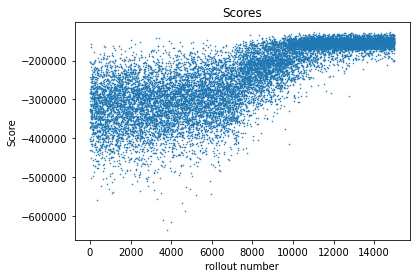

Best score: -126915 achived in iteration: 14797


In [4]:
alpha = 0.999996
n_rollouts = 15000
p, actions, scores = FC.do_rollout(initial_node, n_rollouts, alpha, pickling = False)
FC.depickle_and_plot(scores = scores)

### Visualization and comparison.

The following three cells contain the code respectively for: visualize a sequence of mooves, choose a sequence of moves so to compare the results, compare with a random agent. These pieces of code are here presented with respect to the sequence of moves just constructed. Changing the parameters $p$, $actions$ and $scores$, the same code can be used for every sequence of moves that can be constructed with the others instruments below.

The following line of code allows to visualize the sequence of mooves found in the constructed in the cell above. To visualize the sequence, after having executed the code, press any button. To interrupt, interrupt the kernel.

In [16]:
#FC.visualize_sequence(p, actions, max_steps, n, obstacles)

The following line of code allows the user to try its own sequence of moves, so to compare the cost with the cost achieved by the pure MCTS algorithm ($max(scores)$). To choose a move, press the corresponding number on the keyboard, to interrupt, interrupt the kernel.

In [17]:
#FC.human_perform(initial_node, max_steps, n, obstacles, max(scores))

The following line of code runs $n\_sim$ simulations of the random agent and displays the costs achieved, in the same plot we can display also something relevant for a comparison. For example, here we display $max(scores)$, i.e. the cost of the best sequence achieved with pure MCTS above. 

100 random games simulated, best score achieved: -217809, mean: -342155.19
200 random games simulated, best score achieved: -211157, mean: -347327.285
300 random games simulated, best score achieved: -211157, mean: -346993.99333333335
400 random games simulated, best score achieved: -199604, mean: -346343.9425
500 random games simulated, best score achieved: -199604, mean: -344640.928
600 random games simulated, best score achieved: -199604, mean: -345241.335
700 random games simulated, best score achieved: -199604, mean: -346718.5528571429
800 random games simulated, best score achieved: -194718, mean: -346744.01875
900 random games simulated, best score achieved: -194718, mean: -347027.20222222223
1000 random games simulated, best score achieved: -180226, mean: -346830.126
1100 random games simulated, best score achieved: -180226, mean: -346702.44545454544
1200 random games simulated, best score achieved: -169172, mean: -347098.9533333333
1300 random games simulated, best score achie

10000 random games simulated, best score achieved: -144333, mean: -346652.1
10100 random games simulated, best score achieved: -144333, mean: -346635.96584158414
10200 random games simulated, best score achieved: -144333, mean: -346557.9187254902
10300 random games simulated, best score achieved: -144333, mean: -346594.94155339804
10400 random games simulated, best score achieved: -144333, mean: -346548.45951923076
10500 random games simulated, best score achieved: -144333, mean: -346537.43314285716
10600 random games simulated, best score achieved: -144333, mean: -346464.75273584906
10700 random games simulated, best score achieved: -144333, mean: -346500.0951401869
10800 random games simulated, best score achieved: -144333, mean: -346343.58472222224
10900 random games simulated, best score achieved: -144333, mean: -346427.9653211009
11000 random games simulated, best score achieved: -144333, mean: -346414.533
11100 random games simulated, best score achieved: -144333, mean: -346380.9

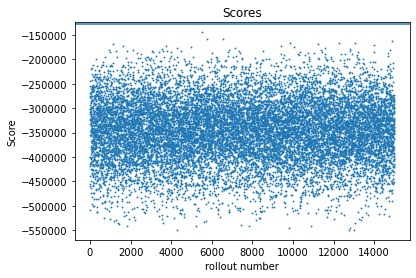

In [5]:
n_sim = 15000
FC.random_agent(initial_node, n_sim, machine_score = max(scores), disp = 100)

### Training the Neural Networks.

In this section we train the three Neural Networks.

With the following cell we declare the data set we want to use for the training and we display its dimensions. To train the first Neural Network set DB='pure_MCTS', to train the second Neural Network set DB='MCTS_NN' and to train the third Neural Network set DB='MCTS_2NN'.

In [24]:
DB = 'MCTS_NN' 
FC.DB_display(DB = DB, first_50 = False)

Train set dimension:  3960
Test set dimension:  1728


With the following cell we initialize the training and test set picking only 1800 samples for the training and 700 for the test set. This in order to keep things fare in the comparison between the various policies.

In [25]:
X_train1, Y_train1, X_test1, Y_test1 = FC.get_train_and_test_set(DB)

X_train1 = X_train1[:1800]
Y_train1 = Y_train1[:1800]
X_test1 = X_test1[:700]
Y_test1 = Y_test1[:700]

X_train = pd.DataFrame(X_train1)
X_test = pd.DataFrame(X_test1)
Y_train = pd.get_dummies(Y_train1, prefix='Label')
Y_test = pd.get_dummies(Y_test1, prefix='Label')

The following cell trains the first neural network. The hyperparameters (tuned as described in the elabprate) shouldn't be changed. NN_1 is the first neural network, at the end of the training a confusion matrix on (the test set) is displayed.

Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                660       
                                                                 
 dropout_16 (Dropout)        (None, 30)                0         
                                                                 
 dense_17 (Dense)            (None, 500)               15500     
                                                                 
 dropout_17 (Dropout)        (None, 500)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                25050     
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_19 (Dense)   

Epoch 104/200
112/112 [==============================] - 0s 1ms/step - loss: 2.3245 - accuracy: 0.6317 - val_loss: 1.0081 - val_accuracy: 0.6514
Epoch 105/200
112/112 [==============================] - 0s 1ms/step - loss: 2.3830 - accuracy: 0.6300 - val_loss: 0.9953 - val_accuracy: 0.6600
Epoch 106/200
112/112 [==============================] - 0s 1ms/step - loss: 2.3132 - accuracy: 0.6267 - val_loss: 1.0019 - val_accuracy: 0.6686
Epoch 107/200
112/112 [==============================] - 0s 1ms/step - loss: 2.4611 - accuracy: 0.6188 - val_loss: 1.0005 - val_accuracy: 0.6629
Epoch 108/200
112/112 [==============================] - 0s 1ms/step - loss: 2.3398 - accuracy: 0.6345 - val_loss: 0.9942 - val_accuracy: 0.6643
Epoch 109/200
112/112 [==============================] - 0s 1ms/step - loss: 2.1956 - accuracy: 0.6379 - val_loss: 1.0030 - val_accuracy: 0.6671
Epoch 110/200
112/112 [==============================] - 0s 1ms/step - loss: 2.3705 - accuracy: 0.6536 - val_loss: 0.9966 - val_ac

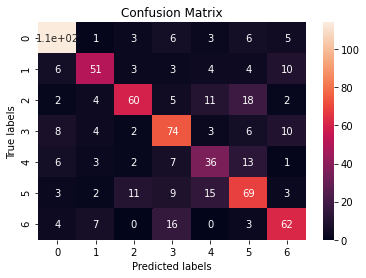

In [26]:
EPOCHS = 200
batch_size = 16
dropout = 0.1
learning_rate = 0.0001
shape = [30,500,50]
activation_functions = ['LeakyReLU', 'LeakyReLU']

if DB == 'pure_MCTS':
    NN_1 = FC.create_model(X_train, Y_train, X_test, Y_test, Y_test1, EPOCHS,
                            shape, activation_functions, batch_size, dropout, learning_rate)
if DB == 'MCTS_NN':
    NN_2 = FC.create_model(X_train, Y_train, X_test, Y_test, Y_test1, EPOCHS,
                            shape, activation_functions, batch_size, dropout, learning_rate)
if DB == 'MCTS_2NN':
    NN_3 = FC.create_model(X_train, Y_train, X_test, Y_test, Y_test1, EPOCHS,
                            shape, activation_functions, batch_size, dropout, learning_rate)

The code in the following cell finds a sequence of moves from the $initial\_node$ using the policy induced by the specified Neural Network. 

OBS: The number of time steps for the simulation here not to be specified since this information is already present in the definition of the initial nose.

In [ ]:
model = NN_1
nodes_sequence, actions_sequence, reward = FC.NN_plays(model, initial_node, other_actions, NN_mooves_rate = 1)    

### MCTS, simulation phases with a policy.


The following cell allows to allow to perform 5000 rollouts of the MCTS using a certain policy in the simulation phases (as it is described in the elaborate). Assign to the 'Neural_Network' parameter one Neural Network among the ones constructed to indicate the policy: for instance, if Neural_Network=NN_1 then the simulation phases of the NN will be driven by the first policy. 

Leaving the second line commented it will use the same starting state as the pure MCTS implemented above.

In [18]:
tree = FC.MCTS()
initial_node, other_actions = FC.initialize_random(tree, C, n, PA, obstacles, robots, max_steps, with_current_actions = True)
alpha = 1
n_rollouts = 5000
Neural_Network = NN_3
disp = 1000 #how many iteration to display the current state of the search
p, actions, scores = FC.do_rollout(initial_node, n_rollouts, alpha, other_actions,
                                   NN = True, model = Neural_Network, NN_game_rate = 0.9, NN_mooves_rate = 0.9, 
                                   disp = disp, pickling = False)
FC.depickle_and_plot(scores = scores)

iteration: 0 exploration weight: 142919.0 , time:  2.9
iteration: 100 exploration weight: 231299.52475247523 , time:  199.7
iteration: 200 exploration weight: 240028.51741293533 , time:  383.4
iteration: 300 exploration weight: 247522.4584717608 , time:  569.2
iteration: 400 exploration weight: 249179.73815461347 , time:  750.0
iteration: 500 exploration weight: 252783.474 , time:  922.3
iteration: 600 exploration weight: 252783.474 , time:  1101.2
iteration: 700 exploration weight: 252783.474 , time:  1275.9
iteration: 800 exploration weight: 252783.474 , time:  1428.3
iteration: 900 exploration weight: 252783.474 , time:  1605.4
iteration: 1000 exploration weight: 252783.474 , time:  1777.4
iteration: 1100 exploration weight: 252783.474 , time:  1948.4
iteration: 1200 exploration weight: 252783.474 , time:  2123.3
iteration: 1300 exploration weight: 252783.474 , time:  2294.2
iteration: 1400 exploration weight: 252783.474 , time:  2471.6
iteration: 1500 exploration weight: 252783.474

KeyboardInterrupt: 

### How we created the data sets for the training of the Neural Networks.

The following cell contains the code used to construct the three data sets (to train the three Neural Networks).
The parameter 'DB' indicate which Data set we want to augment with new couples.  

In [11]:
DB = 'pure_MCTS'  #choose the DataBase to expand
k = 10            #how many time repeat the search (and so, how many sequences to store)
disp = 1000       #how many iteration to display the current state of the search

if DB == 'pure_MCTS': 
    alpha = 0.999996
    n_rollouts = 15000
    model = None
if DB == 'MCTS_NN': 
    alpha = 1
    n_rollouts = 5000
    model = NN_1
if DB == 'MCTS_2NN':
    alpha = 1
    n_rollouts = 5000
    model = NN_2
    
    
FC.enlarge_DB(C, n, PA, obstacles, robots, max_steps,
               n_rollouts, alpha, k, disp, DB, NN_game_rate = 0.9, NN_mooves_rate = 0.9,
               model = model, train_ratio = 0.3)

iteration: 0 exploration weight: 277106.0 , time:  0.2


KeyboardInterrupt: 

### Comparing models.

The next cell allows to compare the models specified in the list $models$. It runs $n\_it$ iterations each time starting from a different (randomly simulated) node and records which of the models achieved the lowest $Cost_{[0,max\_steps]}$ (in the notation of the elaborate).

In [29]:
models = [NN_1, NN_2]
max_steps = 100
n_it = 1000
FC.compare_models(models, n_it, C, n, PA, obstacles, robots, max_steps)

Iteration 10 completed.
Model 1 average score: -236247.0, best model in 4 iterations.
Model 2 average score: -200392.5, best model in 6 iterations.
